In [1]:
from hipposlam.VAE import convert_to_embed

In [1]:
from os.path import join
from hipposlam.DataLoaders import LocalContrastiveEmbeddingDataloader
project_dir = join('data', 'VAE')
load_embed_dir = join(project_dir, 'embeds')
load_annotation_pth = join(project_dir, 'annotations.csv')
dataset = LocalContrastiveEmbeddingDataloader(load_annotation_pth, load_embed_dir, 2, datainds=[0, 10032])

In [2]:
x, labels, sim_mask, dismask = next(dataset.iterate())

In [5]:
import matplotlib.pyplot as plt

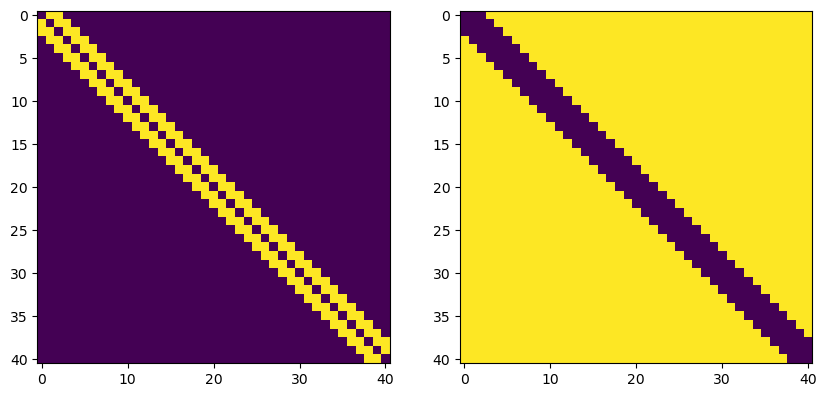

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sim_mask)
ax[1].imshow(dismask)

In [6]:
import torch
foo = torch.load('data/VAE/embeds/all.pt')
foo

tensor([[0.4834, 0.2159, 0.5524,  ..., 0.2220, 0.7817, 0.2295],
        [0.3591, 0.7418, 0.1802,  ..., 0.3479, 0.4185, 0.4305],
        [0.5680, 1.3190, 0.2201,  ..., 0.6139, 0.5738, 0.3120],
        ...,
        [0.4016, 0.4694, 0.2826,  ..., 0.1326, 0.1414, 0.0301],
        [0.4011, 0.3952, 0.2213,  ..., 0.1224, 0.1651, 0.0017],
        [0.3404, 0.3997, 0.3155,  ..., 0.1513, 0.1741, 0.0297]])

In [4]:
from hipposlam.VAE import combine_embeds
combine_embeds('data/VAE/embeds')


In [21]:
inds = torch.where(torch.diff(t) < 1)[0] +1
inds = torch.concat([torch.tensor([0]), inds, torch.tensor([t.shape[0]])])

for i in range(len(inds)-1):
    print(inds[i], inds[i+1])
    print(t[inds[i]:inds[i+1]])
# torch.append()

tensor([ 0, 19, 48, 57])

In [23]:
tslice = t[inds[i]:inds[i+1]]
tslice

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
context_window = 2
dt = torch.abs(tslice.reshape(-1, 1) - tslice.reshape(1, -1))

sim_mask = (dt <=2) & (dt > 0)

tensor([[False,  True,  True, False, False, False, False, False, False],
        [ True, False,  True,  True, False, False, False, False, False],
        [ True,  True, False,  True,  True, False, False, False, False],
        [False,  True,  True, False,  True,  True, False, False, False],
        [False, False,  True,  True, False,  True,  True, False, False],
        [False, False, False,  True,  True, False,  True,  True, False],
        [False, False, False, False,  True,  True, False,  True,  True],
        [False, False, False, False, False,  True,  True, False,  True],
        [False, False, False, False, False, False,  True,  True, False]])